In [22]:
from preprocess import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Dropout
from keras import optimizers
from keras.utils import normalize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
curves_RNN = curves_fitted[['Days', 'g ', 'r ', 'i ', 'z ']].to_numpy().tolist()
types = curves_fitted.Type.to_numpy()

curves_RNN = np.reshape(curves_RNN, (curves_fitted.index.size, 100, 5))
types = types.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(curves_RNN, types,
                                                    test_size=0.4, random_state=42)

In [30]:
X_train.shape

(118992, 100, 5)

## Model 1

- 64 LSTM cells

In [36]:
model_1 = Sequential()
model_1.add(LSTM(64, input_shape=(None, 5), return_sequences=True, dropout=0.2))
model_1.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.005)
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, None, 64)          17920     
                                                                 
 dense_9 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_m1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256, verbose=True)


In [ ]:
predict_1 = model_1.predict(X_test)

predict_round_1 = predict_1.round()[:, 0]
print(f"Accuracy for RNN Classifier Model 1: {accuracy_score(y_test, predict_round_1)*100:0.2f}%")

## Model 2
- 64 LSTM bidirectional cells

In [41]:
model_2 = Sequential()
model_2.add(Bidirectional(LSTM(64, return_sequences=True, dropout=0.2), input_shape=(None, 5)))
# model_2.add(BatchNormalization())
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, None, 128)        35840     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, None, 1)           129       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [42]:
history_m2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256, verbose=True)
predict_2 = model_2.predict(X_test)

Epoch 1/10
465/465 [==============================] - 188s 397ms/step - loss: 0.3194 - accuracy: 0.8632 - val_loss: 0.2553 - val_accuracy: 0.8942
Epoch 2/10
465/465 [==============================] - 251s 540ms/step - loss: 0.2042 - accuracy: 0.9214 - val_loss: 0.4120 - val_accuracy: 0.8492
Epoch 3/10
465/465 [==============================] - 255s 548ms/step - loss: 0.1972 - accuracy: 0.9237 - val_loss: 0.2997 - val_accuracy: 0.8828
Epoch 4/10
465/465 [==============================] - 232s 499ms/step - loss: 0.1613 - accuracy: 0.9390 - val_loss: 0.2791 - val_accuracy: 0.8910
Epoch 5/10
465/465 [==============================] - 241s 518ms/step - loss: 0.1539 - accuracy: 0.9417 - val_loss: 0.1728 - val_accuracy: 0.9351
Epoch 6/10
 29/465 [>.............................] - ETA: 2:54 - loss: 0.1448 - accuracy: 0.9447

KeyboardInterrupt: 

In [35]:
predict_round_2 = predict_2.round()[:, 0]
print(f"Accuracy for RNN Classifier Model 2: {accuracy_score(y_test, predict_round_2)*100:0.2f}%")

Accuracy for RNN Classifier Model 2: 89.42%


<AxesSubplot:>

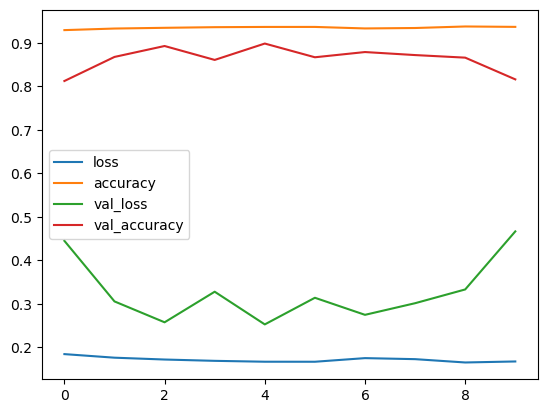

In [40]:
pd.DataFrame(history_m2.history).plot()

In [ ]:
predict_round_2 = [prediction[0].round() for prediction in predict_2]

accuracy_score(y_test, predict_round_2)*100

## Model 3

In [ ]:
model_3 = Sequential()
model_3.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2), input_shape=(None, 5)))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_3.summary()

In [ ]:
history_m3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=True)
predict_3 = model_3.predict(X_test)

In [ ]:
predict_round_3 = predict_3.round()[:, 0]
print(f"Accuracy for RNN Classifier Model 4: {accuracy_score(y_test, predict_round_3)*100:0.2f}%")

## Model 4
- 64 GRU bidirectional cells

In [ ]:
model_4 = Sequential()
model_4.add(Bidirectional(GRU(64, return_sequences=True, dropout=0.2), input_shape=[None, 5]))
model_4.add(Bidirectional(LSTM(32, return_sequences=True)))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_4.summary()

In [ ]:
history_m4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=True)
predict_4 = model_3.predict(X_test)

In [ ]:
predict_round_4 = predict_4.round()[:, 0]
print(f"Accuracy for RNN Classifier Model 4: {accuracy_score(y_test, predict_round_4)*100:0.2f}%")